In [11]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [12]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation1: str
    finalnum1: int
    num3: int
    num4: int
    operation2: str
    finalnum2: int

In [13]:
def adder(state: AgentState):
    """
    Adds two numbers.
    """
    if state["operation1"]== "+":
        state['finalnum1'] = state['num1'] + state['num2']
    return state

def substractor(state: AgentState):
    """
    Substracts two numbers.
    """
    if state["operation1"]== "-":
        state['finalnum1'] = state['num1'] - state['num2']
    return state

def router(state: AgentState):
    """
    decide which operation to perform
    """
    if state["operation1"] == "+":
        return "add_operation"
    elif state["operation1"] == "-":
        return "substract_operation"


def adder2(state: AgentState):
    """
    Adds two numbers to the state.
    """
    if state["operation2"]== "+":
        state['finalnum2'] = state['finalnum1'] + state['num3'] + state['num4']
    return state

def substractor2(state: AgentState):
    """
    Substracts two numbers from the state.
    """
    if state["operation2"]== "-":
        state['finalnum2'] = state['finalnum1'] - state['num3'] - state['num4']
    return state

def router2(state: AgentState):
    """
    decide which operation to perform
    """
    if state["operation2"] == "+":
        return "add_operation2"
    elif state["operation2"] == "-":
        return "substract_operation2"


In [23]:
graph = StateGraph(AgentState)
graph.add_node("add_node1", adder)
graph.add_node("subtract_node1", substractor)
graph.add_node("router", lambda state:state)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", substractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    router,
    {
        "add_operation": "add_node1",
        "substract_operation": "subtract_node1"
    }
)

graph.add_conditional_edges(
    "router2",
    router2,
    {
        "add_operation2": "add_node2",
        "substract_operation2": "subtract_node2"
    }
)


graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app=graph.compile()



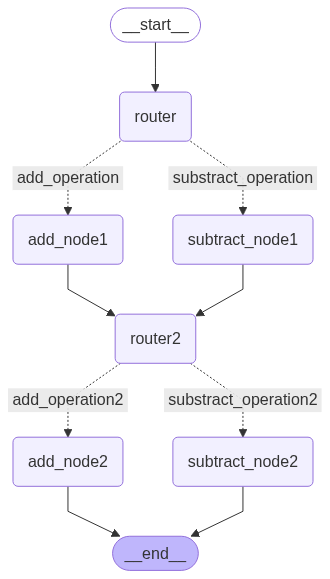

In [24]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
result=app.invoke({"num1": 5, "num2": 3, "operation1": "+", "num3": 2, "num4": 1, "operation2": "-"})

In [30]:
result

{'num1': 5,
 'num2': 3,
 'operation1': '+',
 'finalnum1': 8,
 'num3': 2,
 'num4': 1,
 'operation2': '-',
 'finalnum2': 5}